<a href="https://colab.research.google.com/github/hammaad2002/AdversarialAttack/blob/main/MNIST_digit_classification_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the MNIST dataset in Keras**

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The** **Network** **architecture**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations
model = keras.Sequential([
    layers.Dense(512,activation='relu'),
    layers.Dense(10,activation='softmax')
])

**The compilation step**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [ ]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype("float32")/255

**'Fitting' the model**

In [ ]:
model.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 3ms/step - loss: 0.2557 - accuracy: 0.9261
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1032 - accuracy: 0.9703
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0684 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0493 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0374 - accuracy: 0.9892


**Using the model to make predictions**

In [ ]:
import numpy as np
test_digits = test_images[10]
predictions = model.predict(np.array( [test_digits,] ))
predictions

array([[9.9999511e-01, 4.3568268e-14, 2.9833186e-06, 1.0629647e-09,
        5.4218980e-11, 1.2424840e-07, 4.5441652e-08, 1.3395238e-06,
        9.0832658e-10, 3.4459842e-07]], dtype=float32)

In [ ]:
predictions[0].argmax()

0

In [ ]:
predictions[0][7]

2.925254e-08

In [ ]:
test_labels[0]

7

**Evaluating the model on new data**

In [ ]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print(f"test_acc:{test_acc*100}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.0954 - accuracy: 0.9707
test_acc:97.07000255584717%


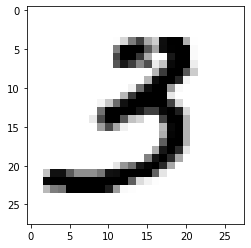

In [ ]:
import random
from tensorflow.keras.datasets import mnist
(train_images1,train_labels1),(test_images1,test_labels1) = mnist.load_data()
import matplotlib.pyplot as plt
temp= random.randint(0,10000)
digit = test_images1[temp]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

In [ ]:
prediction = model.predict(np.array( [test_images[temp],] ))
prediction

array([[1.4265827e-15, 1.1009931e-11, 6.8791139e-11, 1.0000000e+00,
        5.0757272e-15, 3.7929201e-10, 3.4778408e-20, 1.5315627e-15,
        2.1729568e-11, 2.8609582e-12]], dtype=float32)

In [ ]:
print(prediction.argmax())
print(test_labels[temp])

3
3
